In [23]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load dataset

In [2]:
df = pd.read_csv('diabetes_binary_classification_data.csv')
df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


#### Step 2 : Select features from conclusion of data preprocessing

In [3]:
# Define selected features and target variable
features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
             'Veggies', 'DiffWalk', 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income']
X = df[features]
y = df['Diabetes_binary']

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 3: Model Training and Evaluation

##### Model 1 - Logistic Regression

In [5]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_prob)
logistic_auc = auc(logistic_fpr, logistic_tpr)

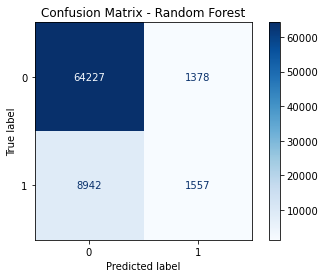

In [6]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, logistic_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [7]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.53      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



##### Model 2 - Decision Tree

In [8]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_prob)
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

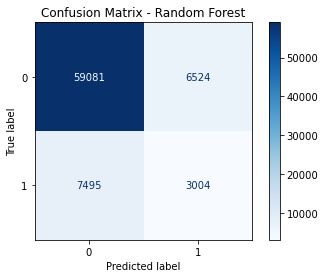

In [10]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, decision_tree_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [11]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     65605
         1.0       0.32      0.29      0.30     10499

    accuracy                           0.82     76104
   macro avg       0.60      0.59      0.60     76104
weighted avg       0.81      0.82      0.81     76104



##### Model 3 - Random Forest

In [18]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_prob = random_forest_model.predict_proba(X_test)[:, 1]
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_prob)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)

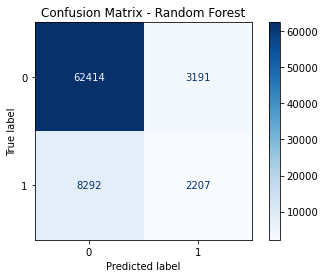

In [19]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, random_forest_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [20]:
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     65605
         1.0       0.41      0.21      0.28     10499

    accuracy                           0.85     76104
   macro avg       0.65      0.58      0.60     76104
weighted avg       0.82      0.85      0.83     76104



##### ROC Curve Comparison for three models

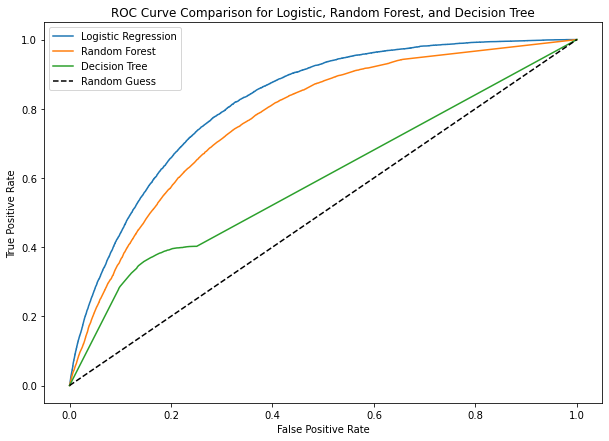

In [21]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 7))
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression')
plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest')
plt.plot(decision_tree_fpr, decision_tree_tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Logistic, Random Forest, and Decision Tree')
plt.legend()
plt.show()

#### Step 4: Experiment on apply PCA to compare the result

In [24]:
# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio for understanding how much variance is retained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each PCA component: ", explained_variance)

Explained Variance by each PCA component:  [0.57772064 0.31216788 0.06869888 0.02896364 0.00539892 0.00176457
 0.00129945 0.00122312 0.00101516 0.00068161]


In [25]:
# Get the components (eigenvectors) and their contributions
pca_components = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components)])

# Display the components and their contributions to each principal component
print(pca_components)

        HighBP  HighChol  CholCheck    Stroke  HeartDiseaseorAttack  \
PC1   0.011097  0.007808   0.000785  0.003440              0.006283   
PC2   0.012656  0.005187   0.000775 -0.000645              0.000036   
PC3  -0.057643 -0.044522  -0.005424 -0.007528             -0.020420   
PC4   0.015712  0.000114  -0.003915  0.007550              0.009259   
PC5  -0.123311 -0.103383  -0.008369 -0.021666             -0.058650   
PC6   0.554667  0.806580   0.030794  0.023735              0.083402   
PC7   0.096746 -0.100356  -0.012365  0.008777             -0.000854   
PC8  -0.809540  0.566836  -0.013156 -0.014058             -0.021028   
PC9  -0.013846 -0.027235   0.001034  0.000626             -0.006759   
PC10 -0.061918 -0.016947   0.010899  0.103428              0.296404   

      PhysActivity   Veggies  DiffWalk       BMI   GenHlth  PhysHlth  \
PC1      -0.011528 -0.003265  0.021230  0.201683  0.067008  0.973622   
PC2      -0.005868 -0.002730  0.003708  0.978152  0.015613 -0.203287   
PC

In [26]:
# Sort and select the top contributing features for the first principal component
top_features_pc1 = pca_components.loc['PC1'].abs().sort_values(ascending=False)
print("Top features contributing to PC1: ", top_features_pc1)

Top features contributing to PC1:  PhysHlth                0.973622
BMI                     0.201683
Income                  0.068492
GenHlth                 0.067008
Age                     0.037040
DiffWalk                0.021230
PhysActivity            0.011528
HighBP                  0.011097
HighChol                0.007808
HeartDiseaseorAttack    0.006283
Stroke                  0.003440
Veggies                 0.003265
CholCheck               0.000785
Name: PC1, dtype: float64


In [ ]:
top_features = ['PhysHlth', 'BMI', 'Income', 'GenHlth']

In [27]:
X_pca = df[top_features_pc1]
y = df['Diabetes_binary']

KeyError: "None of [Float64Index([   0.9736224003306236,   0.20168309874617682,\n                0.06849153040997998,   0.06700770258457218,\n                 0.0370397103185273,  0.021229715321545443,\n               0.011528342463955732,  0.011096546645989717,\n               0.007808350863287782,  0.006282960650043409,\n               0.003439684492894432,    0.0032645225680298,\n              0.0007847647556290475],\n             dtype='float64')] are in the [columns]"

#### Logistic Model using new feature list

In [ ]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_prob)
logistic_auc = auc(logistic_fpr, logistic_tpr)